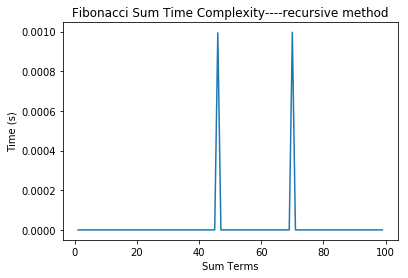

Wall time: 53.7 ms


In [92]:
%%time
#用递归实现
import matplotlib.pyplot as plt
def Fib1(n):
    if n == 1 or n == 2:
        return 1
    else:
        return Fib(n-1) + Fib(n-2)
# 计算不同求和项数的斐波那契数列求和所需的时间
n_values = range(1, 100)
times = []
for n in n_values:
    start_time = time.time()
    Fib(n)
    end_time = time.time()
    times.append(end_time - start_time)

# 绘制求和项数与时间的曲线图
plt.plot(n_values, times)
plt.xlabel('Sum Terms')
plt.ylabel('Time (s)')
plt.title('Fibonacci Sum Time Complexity----recursive method')
plt.show()        
# if __name__ == '__main__':
#     result = Fib(30)              #1346269
#     print(result)


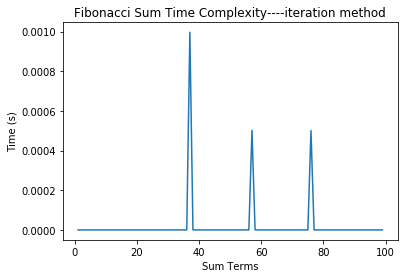

Wall time: 45.1 ms


In [91]:
%%time
#用迭代实现
def Fib2(n):
    a = 1
    b = 1
    c = 0
    sum = 2
    if n == 1:
        return 1
    elif n == 2:
        return 2
    else:
        while(n > 2):            #迭代循环实现和递增
            c = a + b
            a = b
            b = c
            sum = sum + c
            n = n - 1
    return sum
# 计算不同求和项数的斐波那契数列求和所需的时间
n_values = range(1, 100)
times = []
for n in n_values:
    start_time = time.time()
    Fib(n)
    end_time = time.time()
    times.append(end_time - start_time)

# 绘制求和项数与时间的曲线图
plt.plot(n_values, times)
plt.xlabel('Sum Terms')
plt.ylabel('Time (s)')
plt.title('Fibonacci Sum Time Complexity----iteration method')
plt.show()       
# if __name__ == '__main__':
#     result = Fib2(30)           #2178308
#     print(result)

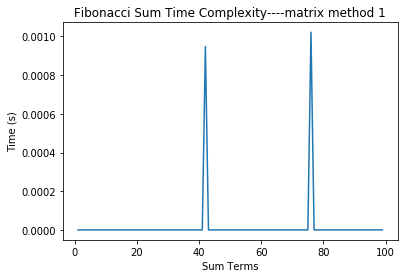

Wall time: 45.1 ms


In [90]:
%%time
#用矩阵实现1
def fibonacci_sum(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1

    base_matrix = [[1, 1], [1, 0]]                        #初始化矩阵
    result_matrix = matrix_power(base_matrix, n - 1)
    
    return result_matrix[0][0]


# 在矩阵快速幂的方法中，当我们需要计算矩阵的n次方时，可以将n分解为n // 2和n // 2两部分。
# 这样，我们可以先计算矩阵的n // 2次方，然后将其平方得到矩阵的n次方。
# matrix_power(matrix, n // 2)表示计算矩阵matrix的n // 2次方。这个函数会根据矩阵快速幂的方法进行计算，返回结果矩阵matrix_half


def matrix_power(matrix, n):
    if n == 1:
        return matrix
    elif n % 2 == 0:
        matrix_half = matrix_power(matrix, n // 2)             #将矩阵matrix的n除以2的整数部分次方赋值给matrix_half
        return multiply_matrices(matrix_half, matrix_half)
    else:
        matrix_half = matrix_power(matrix, (n - 1) // 2)
        return multiply_matrices(multiply_matrices(matrix_half, matrix_half), matrix)


def multiply_matrices(matrix1, matrix2):            #实现矩阵相乘
    result = [[0, 0], [0, 0]]
    
    for i in range(2):
        for j in range(2):
            for k in range(2):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    
    return result
# 计算不同求和项数的斐波那契数列求和所需的时间
n_values = range(1, 100)
times = []
for n in n_values:
    start_time = time.time()
    Fib(n)
    end_time = time.time()
    times.append(end_time - start_time)

# 绘制求和项数与时间的曲线图
plt.plot(n_values, times)
plt.xlabel('Sum Terms')
plt.ylabel('Time (s)')
plt.title('Fibonacci Sum Time Complexity----matrix method 1')
plt.show()       
# #测试
# n = int(input("请输入斐波那契数列的长度："))
# fib_sum = fibonacci_sum(n)                           #832040
# print(f"斐波那契数列前{n}项的和为：{fib_sum}")

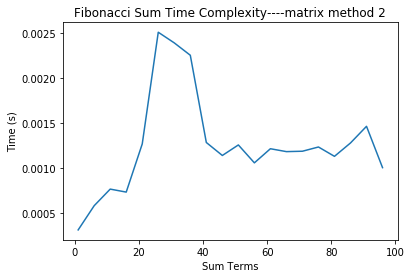

Wall time: 153 ms


In [89]:
%%time
#用矩阵实现2（利用numpy库进行简化）
import matplotlib.pyplot as plt
import numpy as np

def fibonacci_sum(n):
    if n <= 0:
        return 0
    
    # 定义斐波那契数列的矩阵
    fib_matrix = np.array([[1, 1], [1, 0]])
    
    # 使用矩阵快速幂的方法计算fib_matrix的n次方
    fib_matrix_power = np.linalg.matrix_power(fib_matrix, n)
    
    # 斐波那契数列的和为fib_matrix_power的第一行第一列元素
    fibonacci_sum = fib_matrix_power[0][0]
    
    return fibonacci_sum
# 定义不同求和项数的斐波那契数列求和所需的时间
def measure_time(n):
    return timeit.timeit(lambda: fibonacci_sum(n), number=100)

# 计算不同求和项数的斐波那契数列求和所需的时间
n_values = range(1, 100,5)
times = [measure_time(n) for n in n_values]

# 绘制求和项数与时间的曲线图
plt.plot(n_values, times)
plt.xlabel('Sum Terms')
plt.ylabel('Time (s)')
plt.title('Fibonacci Sum Time Complexity----matrix method 2')
plt.show()    
# # 测试
# n = 30
# sum = fibonacci_sum(n)                       
# print(f"The sum of the first {n} Fibonacci numbers is: {sum}")        #1346269


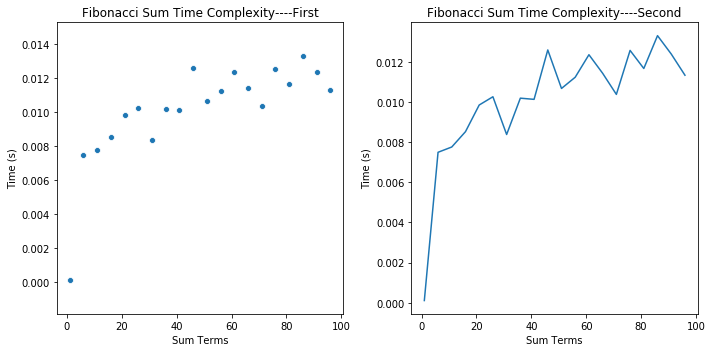

Wall time: 295 ms


In [83]:
%%time
import timeit
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def fibonacci_matrix(n):
    matrix = np.array([[1, 1], [1, 0]])
    result = np.linalg.matrix_power(matrix, n)
    return result[0][1]

def fibonacci_sum(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_matrix(n + 1) - 1

# 定义不同求和项数的斐波那契数列求和所需的时间
def measure_time(n):
    return timeit.timeit(lambda: fibonacci_sum(n), number=1000)

# 计算不同求和项数的斐波那契数列求和所需的时间
n_values = range(1, 100,5)
times = [measure_time(n) for n in n_values]

#下述代码是为了让两张图输出在一行
# 创建一个1行2列的subplot布局
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 绘制求和项数与时间的点阵图(偶然看到了就尝试一下seaborn画图)
sns.scatterplot(n_values, times, ax=axes[0])
axes[0].set_xlabel('Sum Terms')
axes[0].set_ylabel('Time (s)')
axes[0].set_title('Fibonacci Sum Time Complexity----First')

# 绘制求和项数与时间的曲线图
axes[1].plot(n_values, times)
axes[1].set_xlabel('Sum Terms')
axes[1].set_ylabel('Time (s)')
axes[1].set_title('Fibonacci Sum Time Complexity----Second')

# 调整subplot之间的间距
plt.tight_layout()

# 显示图表
plt.show()